In [1]:
import camber

In [2]:
spark = camber.spark.connect(worker_size="XSMALL")

Output()

# Necessary Imports

In [3]:
import pyspark

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

# Load the dataset 

In [4]:
DATA_PATH = "s3a://camber-spark-bkt/ciber-catts/shared-data/titanic"

In [5]:
train_data = f"{DATA_PATH}/train.csv"
test_data = f"{DATA_PATH}/test.csv"

In [6]:
df = spark.read.format("csv").option("inferSchema", "true").option("header", "true") \
  .option("sep", ",") \
  .load(train_data)

# Dataset Overview

In [7]:
print('Schema overview')
df.printSchema()

Schema overview
root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [8]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,PassengerId,int
1,Survived,int
2,Pclass,int
3,Name,string
4,Sex,string
5,Age,double
6,SibSp,int
7,Parch,int
8,Ticket,string
9,Fare,double


In [9]:
# Use the describe() function to get the summary statistics
summary_df = df.describe()

# Show the summary statistics
summary_df.show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

# Identifying Missing Values

In [10]:
from pyspark.sql.functions import col, sum

# Assuming you have a DataFrame called 'df'
# Calculate the count of missing values in each column
missing_counts = df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns])

# Show the count of missing values
missing_counts.show()


+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



## Filling missing values for 'Cabin' with 'Unknown'

In [11]:
# Assuming you have a DataFrame called 'df' representing the Titanic dataset
# Extract the unique values in the 'Cabin' column
cabin_values = df.select("Cabin").distinct()

# Show the unique values in the 'Cabin' column
cabin_values.show()

+-------+
|  Cabin|
+-------+
|    A23|
|    B79|
|    E44|
|  F E69|
|    D28|
|    C78|
|    C95|
|  F G73|
|B58 B60|
|     D7|
|   C128|
|    B39|
|    B22|
|   C110|
|    D21|
|     F2|
|    B30|
|   C104|
|    B50|
|     A6|
+-------+
only showing top 20 rows



In [12]:
# Fill missing values in the 'Cabin' column with a specific value, such as 'Unknown'
df = df.fillna({'Cabin': 'Unknown'})

# Show the DataFrame with filled missing values
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|Unknown|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|    C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|Unknown|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|   C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|Unknown|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|  

## Filling missing values for 'Age'

In [13]:
# Calculate summary statistics of the 'Age' column
summary_df = df.select("Age").describe()

# Show the summary statistics
summary_df.show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               714|
|   mean| 29.69911764705882|
| stddev|14.526497332334035|
|    min|              0.42|
|    max|              80.0|
+-------+------------------+



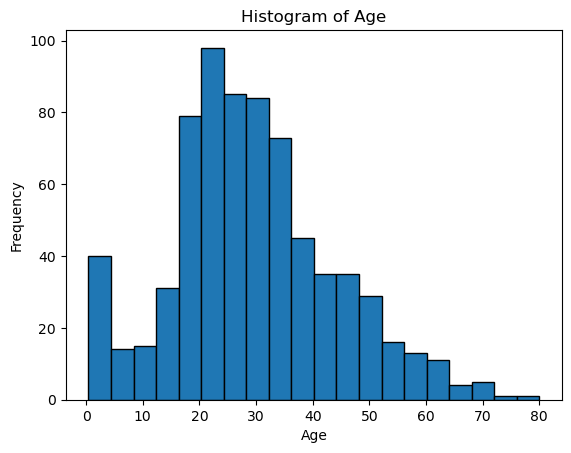

In [14]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' representing the Titanic dataset
# Filter out missing values in the 'Age' column
age_data = df.select('Age').dropna().toPandas()

# Create a histogram using PySpark's built-in visualization
plt.hist(age_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


🔑 **Note:** Since the distribution is slightly right-skewed, using the median as a measure of central tendency can be a suitable option. Replace the missing values with the median value of the dataset or the specific column.

In [15]:
df.approxQuantile("Age", [0.5], 0.001)

[28.0]

In [16]:
# Calculate the median of the column with missing values
median_value = df.approxQuantile("Age", [0.5], 0.001)[0]

# Fill missing values with the median value
df = df.fillna({'Age': median_value})

🔑 **Note:** 
1. The `approxQuantile()` function is used to estimate quantiles, such as the median. In this case, we pass `[0.5]` as the desired quantile, which corresponds to the median. The last argument, `0.001`, represents the relative error tolerance for the approximation. You can adjust this value based on your requirements.

2. Once you obtain the estimated median value, you can use the `fillna()` function to fill the missing values in the specified column with the median value.

In [17]:
from pyspark.sql.functions import col, sum

# Assuming you have a DataFrame called 'df'
# Calculate the count of missing values in each column
missing_counts = df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns])

# Show the count of missing values
missing_counts.show()


+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|    0|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



## Dropping rows for missing values of 'Embarked'

The "Embarked" column in the Titanic dataset refers to the port of embarkation for each passenger. It represents the location where passengers boarded the Titanic. The possible values for the "Embarked" column are:

* C: Cherbourg
* Q: Queenstown (now known as Cobh)
* S: Southampton
These values indicate the three ports from which passengers boarded the Titanic. The "Embarked" column provides information about the initial embarkation point of each passenger and can be used to analyze patterns related to their embarkation location.

It's worth noting that the "Embarked" column may contain few missing values (null values) for some passengers in the dataset. These missing values can be handled by excluding the corresponding rows from analysis.

In [18]:
# Assuming you have a DataFrame called 'df' representing the Titanic dataset
# Extract the unique values in the 'Cabin' column
embarked_values = df.select("Embarked").distinct()

# Show the unique values in the 'Cabin' column
embarked_values.show()

+--------+
|Embarked|
+--------+
|       Q|
|    null|
|       C|
|       S|
+--------+



In [19]:
# Drop rows with missing values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])

# Show the DataFrame after dropping rows with missing values
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|Unknown|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|    C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|Unknown|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|   C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|Unknown|       S|
|          6|       0|     3|    Moran, Mr. James|  male|28.0|  

## Anymore missing values?

In [20]:

from pyspark.sql.functions import col, sum

# Assuming you have a DataFrame called 'df'
# Calculate the count of missing values in each column
missing_counts = df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns])

# Show the count of missing values
missing_counts.show()


+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|    0|       0|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



# Exploratory Data Analysis

## How many survived?

In [21]:
df.groupBy("Survived").count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  340|
|       0|  549|
+--------+-----+



🔑 **Note:**

1. The code `df.groupBy("Survived").count().show()` performs a grouping operation on the "Survived" column of the DataFrame df and counts the number of occurrences for each unique value.

2. The output will show the counts of "Survived" values, along with the corresponding counts for each category (e.g., 0 for not survived and 1 for survived).

## How the survival rate was correlated with some variables/features:

### Sex:

In [22]:
df.groupBy("Sex","Survived").count().show()

+------+--------+-----+
|   Sex|Survived|count|
+------+--------+-----+
|  male|       0|  468|
|female|       1|  231|
|female|       0|   81|
|  male|       1|  109|
+------+--------+-----+



In [23]:
df.groupBy("Sex", "Survived").count().show()


+------+--------+-----+
|   Sex|Survived|count|
+------+--------+-----+
|  male|       0|  468|
|female|       1|  231|
|female|       0|   81|
|  male|       1|  109|
+------+--------+-----+



In [24]:
# total_counts.select("total").groupBy().sum("total").collect()[0][0]

In [25]:
# Group by "Sex" and "Survived" columns and calculate counts
grouped_df = df.groupBy("Sex", "Survived").count()

# Calculate total counts for each category of "Sex"
total_counts = grouped_df.groupBy("Sex").agg(sum("count").alias("total"))

# Calculate overall total count
overall_total_count = total_counts.select("total").groupBy().sum("total").collect()[0][0]

# Calculate percentages overall
grouped_df_with_percentage = grouped_df.join(total_counts, "Sex").withColumn("percentage (overall)", (grouped_df["count"] / overall_total_count) * 100)

# Show the grouped DataFrame with counts and percentages
grouped_df_with_percentage.show()


+------+--------+-----+-----+--------------------+
|   Sex|Survived|count|total|percentage (overall)|
+------+--------+-----+-----+--------------------+
|  male|       0|  468|  577|   52.64341957255343|
|female|       1|  231|  312|  25.984251968503933|
|female|       0|   81|  312|   9.111361079865016|
|  male|       1|  109|  577|  12.260967379077616|
+------+--------+-----+-----+--------------------+



👀 **Observation:**

1. The dataset shows that nearly two-thirds (65%) of the passengers were male, while the remaining one-third (35%) were female.

2. The most notable observation is the significant difference in survival rates between women and men: approximately 75% of the female passengers survived, whereas only around 18.9% of the male passengers managed to survive.

### Pclass:

In [26]:
# Group by "Pclass" and "Survived" columns and calculate counts
grouped_df = df.groupBy("Pclass", "Survived").count()

# Calculate total counts for each category of "Pclass"
total_counts = grouped_df.groupBy("Pclass").agg(sum("count").alias("total"))

total_counts.show()

# Calculate percentages for each "Pclass"
grouped_df_with_percentage = grouped_df.join(total_counts, "Pclass")
grouped_df_with_percentage = grouped_df_with_percentage.withColumn("percentage(within class)", grouped_df_with_percentage["count"] / grouped_df_with_percentage["total"] * 100)

# # Show the grouped DataFrame with counts and percentages
grouped_df_with_percentage.show()


+------+-----+
|Pclass|total|
+------+-----+
|     1|  214|
|     3|  491|
|     2|  184|
+------+-----+

+------+--------+-----+-----+------------------------+
|Pclass|Survived|count|total|percentage(within class)|
+------+--------+-----+-----+------------------------+
|     1|       0|   80|  214|       37.38317757009346|
|     3|       1|  119|  491|      24.236252545824847|
|     1|       1|  134|  214|      62.616822429906534|
|     2|       1|   87|  184|       47.28260869565217|
|     2|       0|   97|  184|       52.71739130434783|
|     3|       0|  372|  491|       75.76374745417516|
+------+--------+-----+-----+------------------------+



👀 **Observation:**

1. Among the passenger classes, class 3 had the largest number of travelers, followed by class 1, while class 2 had the fewest passengers. Surprisingly, the number of travelers in class 3 was greater than the combined number of passengers in class 1 and class 2.

2. The survival rate for class 1 passengers was the highest at around 63%. Class 2 and class 3 passengers had lower survival rates, approximately 47.3% and 24.2%, respectively.

### Age:

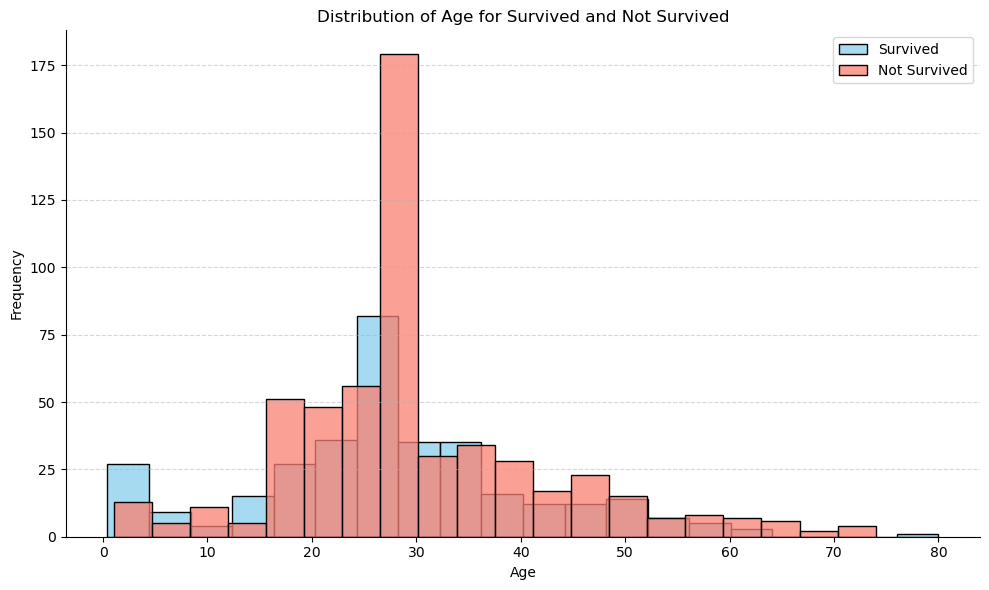

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for passengers who survived and those who didn't
survived_data = df.filter(df.Survived == 1).select("Age").dropna().toPandas()
not_survived_data = df.filter(df.Survived == 0).select("Age").dropna().toPandas()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for the "Age" column
sns.histplot(survived_data["Age"], bins=20, color='skyblue', label="Survived", ax=ax)
sns.histplot(not_survived_data["Age"], bins=20, color='salmon', label="Not Survived", ax=ax)

# Customize plot appearance
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Age for Survived and Not Survived")
ax.legend()

# Remove spines
sns.despine()

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


👀 **Observation:**

1. The survival rate among senior individuals (aged over 60) was notably low.

2. Interestingly, contrary to our initial expectations, teenagers and people in their twenties had a lower survival rate compared to individuals in their forties and fifties.


### Embarked:

In [28]:
# Group by "Embarked" and "Survived" columns and calculate counts
grouped_df = df.groupBy("Embarked", "Survived").count()

# Calculate total counts for each category of "Embarked"
total_counts = grouped_df.groupBy("Embarked").sum("count").withColumnRenamed("sum(count)", "total")
total_counts.show()
# Calculate percentages overall for each combination
grouped_df_with_percentage = grouped_df.join(total_counts, "Embarked")
grouped_df_with_percentage = grouped_df_with_percentage.withColumn("percentage (within class)", grouped_df_with_percentage["count"] / grouped_df_with_percentage["total"] * 100)

# Calculate overall total count
overall_total_count = grouped_df_with_percentage.groupBy().sum("count").collect()[0][0]

# Calculate overall percentages
grouped_df_with_percentage = grouped_df_with_percentage.withColumn("overall_percentage", (grouped_df_with_percentage["count"] / overall_total_count) * 100)

# Show the grouped DataFrame with counts, percentages, and overall percentages
grouped_df_with_percentage.show()


+--------+-----+
|Embarked|total|
+--------+-----+
|       Q|   77|
|       C|  168|
|       S|  644|
+--------+-----+

+--------+--------+-----+-----+-------------------------+------------------+
|Embarked|Survived|count|total|percentage (within class)|overall_percentage|
+--------+--------+-----+-----+-------------------------+------------------+
|       Q|       1|   30|   77|       38.961038961038966| 3.374578177727784|
|       S|       0|  427|  644|        66.30434782608695|48.031496062992126|
|       S|       1|  217|  644|        33.69565217391305|24.409448818897637|
|       C|       1|   93|  168|        55.35714285714286| 10.46119235095613|
|       Q|       0|   47|   77|       61.038961038961034| 5.286839145106861|
|       C|       0|   75|  168|       44.642857142857146|  8.43644544431946|
+--------+--------+-----+-----+-------------------------+------------------+



👀 **Observation:**

1. The "Embarked" column indicates the port of embarkation, where "C" represents Cherbourg, "Q" represents Queenstown, and "S" represents Southampton.
2. The largest proportion of travelers, approximately 72%, boarded from Southampton. Around 19% boarded from Cherbourg, and the remaining passengers, nearly 9%, embarked from Queenstown.
3. Among the passengers, only those who boarded from Cherbourg had a survival rate exceeding 50%. Passengers who boarded from Southampton had the lowest chance of survival, approximately 33%.

### Fare: 

In [29]:
df.groupBy("Fare","Survived").count().show()

+--------+--------+-----+
|    Fare|Survived|count|
+--------+--------+-----+
|    28.5|       0|    1|
| 56.4958|       1|    5|
|   24.15|       0|    7|
|   120.0|       1|    4|
|   15.85|       0|    2|
|  8.6625|       0|   12|
|    79.2|       0|    2|
|   36.75|       0|    1|
|  8.4042|       0|    1|
|  83.475|       1|    1|
|    71.0|       1|    1|
|211.3375|       1|    3|
|   78.85|       1|    1|
|    16.1|       1|    2|
|    12.0|       1|    1|
|  8.4333|       0|    1|
|   7.925|       1|    8|
| 15.0458|       0|    1|
|   79.65|       1|    2|
|     8.3|       0|    1|
+--------+--------+-----+
only showing top 20 rows



In [30]:
from pyspark.sql.functions import col

# 
# Calculate the quartiles for the "Fare" column
quartiles = df.approxQuantile("Fare", [0.25, 0.5, 0.75], 0.0)

# Create a DataFrame to display the quartiles
quartiles_df = spark.createDataFrame([(quartiles[0], quartiles[1], quartiles[2])], ["First Quartile", "Median", "Third Quartile"])

# Show the quartiles DataFrame
quartiles_df.show()


+--------------+-------+--------------+
|First Quartile| Median|Third Quartile|
+--------------+-------+--------------+
|        7.8958|14.4542|          31.0|
+--------------+-------+--------------+



Splitting the fare feature into 4 categories according to the quartiles:

In [31]:
from pyspark.sql.functions import col, when

# Define the bins and labels for fare classes
fare_bins = [0, 7.9, 14.45, 31, 512.33]
fare_labels = ['Low', 'Moderate-Mid', 'Moderate-High', 'High']

# Create a new column "Fare_Class" based on the "Fare" column
df = df.withColumn('Fare_Class', when((col('Fare') >= fare_bins[0]) & (col('Fare') < fare_bins[1]), fare_labels[0])
                                .when((col('Fare') >= fare_bins[1]) & (col('Fare') < fare_bins[2]), fare_labels[1])
                                .when((col('Fare') >= fare_bins[2]) & (col('Fare') < fare_bins[3]), fare_labels[2])
                                .otherwise(fare_labels[3]))

# Show the updated DataFrame with the new "Fare_Class" column
df.show()


+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+-------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|  Cabin|Embarked|   Fare_Class|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-------+--------+-------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|Unknown|       S|          Low|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|    C85|       C|         High|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|Unknown|       S| Moderate-Mid|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|   C123|       S|         High|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|         

In [32]:
df.groupBy("Fare_Class","Survived").count().show()

+-------------+--------+-----+
|   Fare_Class|Survived|count|
+-------------+--------+-----+
| Moderate-Mid|       1|   67|
|         High|       1|  129|
|         High|       0|   94|
| Moderate-Mid|       0|  150|
|          Low|       0|  179|
|Moderate-High|       1|  100|
|Moderate-High|       0|  126|
|          Low|       1|   44|
+-------------+--------+-----+



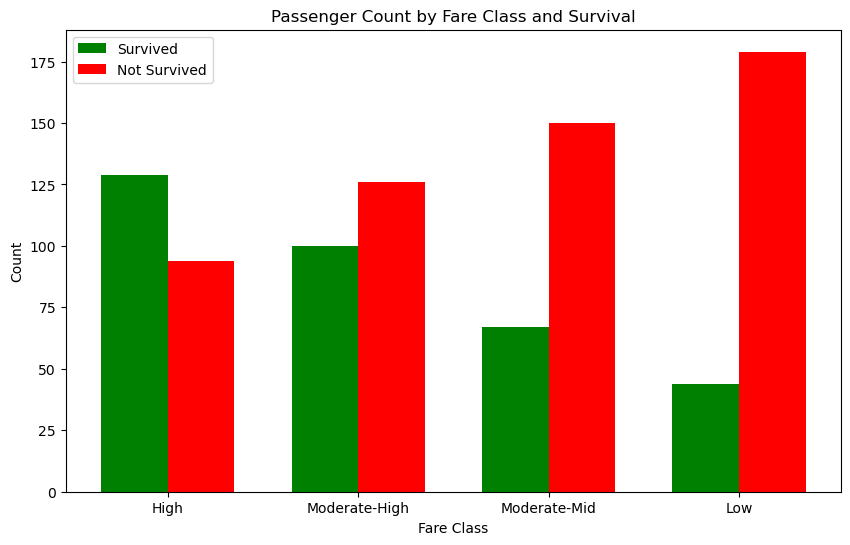

In [33]:
import matplotlib.pyplot as plt

# Group by "Fare_Class" and "Survived" columns and calculate counts
grouped_df = df.groupBy("Fare_Class", "Survived").count()

# Pivot the DataFrame to reshape it for side-by-side comparison
pivot_df = grouped_df.groupBy("Fare_Class").pivot("Survived").sum("count").fillna(0)

# Calculate the survival rate for each fare class
pivot_df = pivot_df.withColumn("Survival_Rate", pivot_df["1"] / (pivot_df["0"] + pivot_df["1"]))

# Sort the DataFrame based on the survival rate in descending order
pivot_df = pivot_df.orderBy("Survival_Rate", ascending=False)

# Convert the DataFrame to Pandas for plotting
pivot_pd = pivot_df.toPandas()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = range(len(pivot_pd))

# Plot the grouped bars for survived passengers
ax.bar(x, pivot_pd["1"], width=bar_width, color="green", label="Survived")

# Plot the grouped bars for not survived passengers
ax.bar([i + bar_width for i in x], pivot_pd["0"], width=bar_width, color="red", label="Not Survived")

# Set the labels and title
ax.set_xlabel("Fare Class")
ax.set_ylabel("Count")
ax.set_title("Passenger Count by Fare Class and Survival")

# Set the x-axis tick labels
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(pivot_pd["Fare_Class"])

# Show the legend
ax.legend()

# Display the plot
plt.show()


👀 **Observation:** Generally, there is a tendency for higher fares to be associated with higher survival rates.